In [2]:
pip install pysrt

     |████████████████████████████████| 112kB 9.1MB/s 
  Created wheel for pysrt: filename=pysrt-1.1.2-cp37-none-any.whl size=13445 sha256=f4504c8f9c04d14c377ad6d3574e810d7ced7ffe3776346aea1392411dcf061f
  Stored in directory: /root/.cache/pip/wheels/57/7d/68/0307a3018abbaa1a7b870e6419123d07480dd169bfdea74aea
Successfully built pysrt


In [3]:
from datetime import date, datetime, timedelta, time
import pysrt
from textblob import TextBlob
import matplotlib
from matplotlib import style
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
matplotlib.rcParams['figure.figsize'] = (16.0, 9.0)
style.use('fivethirtyeight')

In [4]:
# Helper Function to create equally divided time intervals
# start - Starting Time
# end - Ending Time
# delta - Interval Period
def create_intervals(start, end, delta):
    curr = start
    while curr <= end:
        curr = (datetime.combine(date.today(), curr) + delta).time()
        yield curr


In [5]:
# Main Function to Get Sentiment Data
# file - srt file location
# delta - time interval in minutes
def get_sentiment(file, delta=2):
    # Reading Subtitle
    subs = pysrt.open(file, encoding='iso-8859-1')
    n = len(subs)
    # List to store the time periods
    intervals = []
    # Start, End and Delta
    start = time(0, 0, 0)
    end = subs[-1].end.to_time()
    delta = timedelta(minutes=delta)
    for result in create_intervals(start, end, delta):
        intervals.append(result)
    # List to store sentiment polarity
    sentiments = []
    
    index = 0
    m = len(intervals)
    # Collect and combine all the text in each time interval
    for i in range(m):
        text = ""
        for j in range(index, n):
            # Finding all subtitle text in the each time interval
            if subs[j].end.to_time() < intervals[i]:
                text += subs[j].text_without_tags + " "
            else:
                break
        # Sentiment Analysis
        blob = TextBlob(text)
        pol = blob.sentiment.polarity
        sentiments.append(pol)
        index = j
    # Adding Initial State
    intervals.insert(0, time(0, 0, 0))
    sentiments.insert(0, 0.0)
    return (intervals, sentiments)


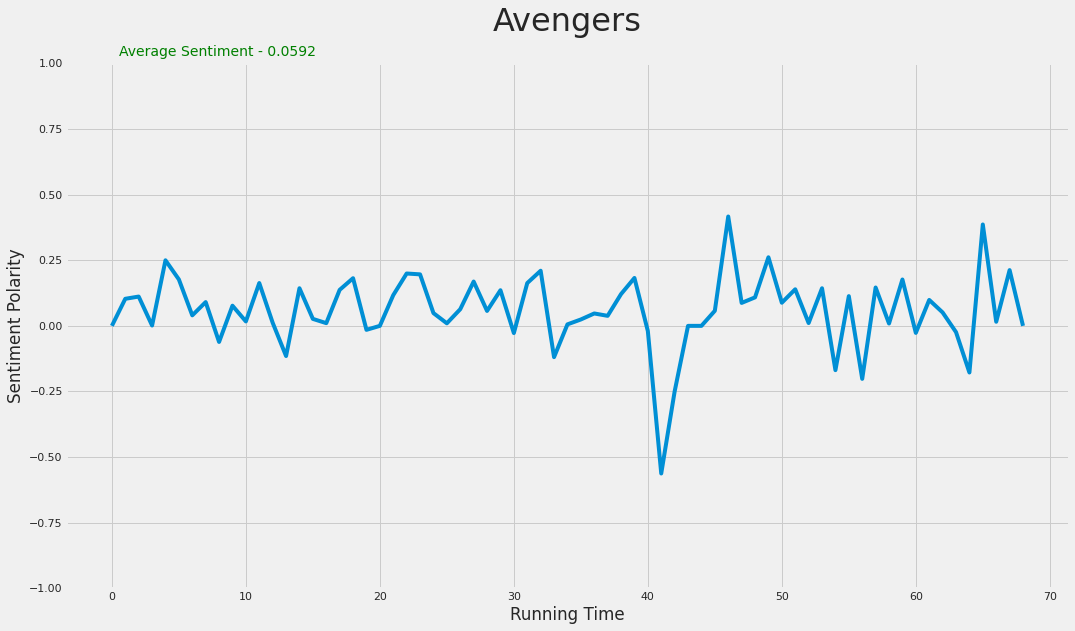

In [10]:
# Utility to find average sentiment
def average(y):
    avg = float(sum(y))/len(y)
    return avg

x, y = get_sentiment("/content/drive/MyDrive/avengers.srt")
fig, ax = plt.subplots()
plt.plot(y)
plt.title("Avengers", fontsize=32)
plt.ylim((-1, 1))
plt.ylabel("Sentiment Polarity")
plt.xlabel("Running Time")
plt.text(.5, 1.03, "Average Sentiment - " + str(round(average(y), 4)), color="green")
ttl = ax.title
ttl.set_position([.5, 1.05])
plt.savefig("Avengers.png")